**Описание проекта**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

**Описание данных**

Данные для первой части

Файл hypothesis
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части

Файл orders
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл visitors
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**Описание проекта**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

***Часть 1. Приоритизация гипотез.***

В файле hypothesis 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.
***Часть 2. Анализ A/B-теста***

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Проанализируйте A/B-тест:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
#Посмотрим на таблицу hypothesis
pd.set_option('display.max_colwidth', -1)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
#Приведем названия столбцов к нижнему регистру
column_list=[]
for column in hypothesis.columns:
    column = column.lower()
    column_list.append(column)
hypothesis.columns = column_list

***Часть 1. Приоритизация гипотез.***
1. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [6]:
hypothesis['ICE'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективные гипотизы по ICE - 8, 0, 7 (6, 2)

2. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [7]:
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По этому показателю, наиболее перспективные гипотезы - 7, 2, 0, 6. 8ая гипотеза находится по середине в отличии от показателя ICE, где она на первом месте.

3. Посмотрим, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [8]:
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


Параметр охвата (Reach), использующийся в методе RICE изменил всю приоритетность, полученную по методу ICE:

* Без учета охвата на первом месте идет акция со скидкой имениннику, но параметр Reach справедливо понизил приоритет этой акции, т.к. и правда, охват её минимальный (по сравнению с другими гипотезами увеличения выручки);
* Также произошло и с гипотезой о добавлении 2х каналов трафика, с организацией своей службы доставки и с идеей о добавлении страницы отзывов;
* Без изменений осталась рейтинговая позиция гипотез о добавлении баннеров с актуальными акциями на главную страницу и идея с изменением цвета фона главной страницы);
* Выросли в рейтинге (стали более приоритетными) RICE (по сравнению с ICE) гипотеза о добавлении формы подписки на все основные страницы ресурса, о добавлении блоков рекомендаций товаров и предложение об изменении структуры категорий.

***Часть 2. Анализ A/B-теста***

In [9]:
#Посмотрим на данные
orders.head(15)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
transactionId,1197.0,2.155621e+09,1.229085e+09,1062393.0,1.166776e+09,2.145194e+09,3.237740e+09,4.293856e+09
visitorId,1197.0,2.165960e+09,1.236014e+09,5114589.0,1.111826e+09,2.217985e+09,3.177606e+09,4.283872e+09
revenue,1197.0,8.348006e+03,3.919113e+04,50.0,1.220000e+03,2.978000e+03,8.290000e+03,1.294500e+06


In [12]:
orders.duplicated().sum()

0

Дублей нет.

Нужно изменить формат стобца date с object на date

In [13]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()
#ИЛИ
#orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d %H:%M:%S')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [14]:
#Посмотрим на данные
visitors#.head(15)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
visitors.describe().T

,count,mean,std,min,25%,50%,75%,max
visitors,62.0,607.290323,114.40056,361.0,534.0,624.5,710.5,770.0


Нужно изменить формат стобца date с object на date

In [17]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
#или
#visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d %H:%M:%S')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


* В таблицах изменили формат с object на datetime, там где это нужно.
* Пропусков и дубликатов не обнаружено.
* Данные по А/В тесту за август 2019 года.
* Максимальное кол-во визитов в день - 770, минимальное - 361.
* Доход по дням колеблется от 50 до 1294500, явно есто выбросы, потому что медиана состовляет 2978.

Посмотрим есть ли пользователи которые относятся как к группе А, так и к группе B.

In [18]:
# формируем группу риска (пользователи с более чем 1 заказом)

sizes = orders.groupby(['visitorId', 'group']).size().reset_index()
sizes.columns = ['visitorId', 'group', 'count']
sizes = sizes.query('count > 1').sort_values(by='visitorId')
sizes.head(10)

,visitorId,group,count
45,199603092,A,4
58,237748145,A,4
63,249864742,B,3
94,366673373,A,2
104,393266494,B,2
108,406208401,B,2
122,457167155,B,3
138,522292794,B,2
158,611059232,A,3
177,678354126,A,2


In [19]:
sizes['visitorId'].duplicated().sum()

5

In [20]:
sizes['visitorId'].value_counts().head(7)

2458001652    2
1230306981    2
2038680547    2
2378935119    2
4256040402    2
3891541246    1
2744017357    1
Name: visitorId, dtype: int64

Пользователи, которые видели обе версии сайта: 2458001652, 1230306981, 2038680547, 2378935119, 4256040402

In [21]:
broken_users = [2458001652, 1230306981, 2038680547, 2378935119, 4256040402]
#Посмотрим данные по ним по датафрейму orders:
broken_orders = orders.query('visitorId in @broken_users')
print('Количество строк в датафрейме orders по этим пользователям: {}'.format(broken_orders.shape[0]))
broken_orders.head()

Количество строк в датафрейме orders по этим пользователям: 44


,transactionId,visitorId,date,revenue,group
32,3666913472,2038680547,2019-08-15,1680,B
33,486237576,2378935119,2019-08-15,1650,A
60,1421016313,4256040402,2019-08-16,56650,B
114,1120327437,4256040402,2019-08-01,5800,A
117,722060263,2038680547,2019-08-22,760,A


In [22]:
#Посмотрим, сколько заказов они сделали, на какую сумму и по каким группам:
broken_orders_grouped = (broken_orders.groupby(['visitorId', 'group', 'date'])
                                      .agg({'transactionId': 'nunique', 'revenue': 'sum'})
                         )
broken_orders_grouped

transactionId  revenue
visitorId  group date                              
1230306981 A     2019-08-09  3              18440  
           B     2019-08-09  2              12840  
2038680547 A     2019-08-04  2              4070   
                 2019-08-17  1              3470   
                 2019-08-22  1              760    
                 2019-08-25  1              270    
           B     2019-08-04  1              2800   
                 2019-08-15  1              1680   
                 2019-08-29  1              2420   
2378935119 A     2019-08-10  1              58220  
                 2019-08-15  1              1650   
                 2019-08-17  1              310    
                 2019-08-22  1              3390   
           B     2019-08-09  1              30649  
                 2019-08-10  1              2640   
                 2019-08-25  1              21220  
                 2019-08-28  2              24860  
2458001652 A     2019-08-04  1              340    
                 2019-08-06  1              1620   
                 2019-08-07  1              17379  
                 2019-08-11  1              8280   
                 2019-08-22  1              5190   
           B     2019-08-05  1              2420   
                 2019-08-06  2              14030  
                 2019-08-08  1              5227   
                 2019-08-09  1              5227   
                 2019-08-25  1              2385   
4256040402 A     2019-08-01  1              5800   
                 2019-08-12  1              50     
                 2019-08-17  1              1550   
                 2019-08-20  1              17650  
                 2019-08-23  1              16950  
                 2019-08-27  1              1630   
                 2019-08-31  1              5170   
           B     2019-08-08  1              58220  
                 2019-08-16  1              56650  
                 2019-08-18  1              10970  
                 2019-08-31  1              1850

Они сделали в общей сложности 44 заказа и принесли компании немало выручки. Получается, что данные "испорчены" этими пользователями.

Что бы корректно проанализировать А/В тест, уберем из основных датафреймов orders и visitors данные по этим пользователям.Удалим из датафрейма orders список broken_users, а из таблицы visitors удалим по 1 broken-посетителю в соответствующих группах в соответствии с датами, полученными выше.

Чистим датафреймы:
* orders

In [23]:
orders = orders.query('visitorId not in @broken_users')

* visitors:

Сначала добавим к нашему кастомному датафрейму столбец count, где проставим значение -1, и возьмем только столбцы group, date и count:

In [24]:
broken_orders_grouped = broken_orders_grouped.reset_index()
broken_orders_grouped['count'] = -1
broken_orders_grouped = broken_orders_grouped[['group', 'date', 'count']]
broken_orders_grouped = broken_orders_grouped.groupby(['group', 'date']).agg({'count': 'sum'}).reset_index()
broken_orders_grouped.head()

,group,date,count
0,A,2019-08-01,-1
1,A,2019-08-04,-2
2,A,2019-08-06,-1
3,A,2019-08-07,-1
4,A,2019-08-09,-1


In [25]:
# Объединим наш начальный датайфрейм visitors с полученным выше:

visitors_filt = visitors.merge(broken_orders_grouped, on=['date', 'group'], how='left').fillna(0)
visitors_filt.head()

,date,group,visitors,count
0,2019-08-01,A,719,-1.0
1,2019-08-02,A,619,0.0
2,2019-08-03,A,507,0.0
3,2019-08-04,A,717,-2.0
4,2019-08-05,A,756,0.0


In [26]:
# Теперь в столбеце visitors, построчно просуммируем значения столбцов visitors и count:

visitors_filt['visitors_'] = visitors_filt['visitors'] + visitors_filt['count']
#visitors_filt.head()

# Отбросим вспомогательный столбец count:

visitors_filt = visitors_filt.drop(['visitors', 'count'], axis=1)
visitors_filt.columns = ['date', 'group', 'visitors']
visitors_filt['visitors'] = visitors_filt['visitors'].astype(int)
visitors = visitors_filt
visitors

,date,group,visitors
0,2019-08-01,A,718
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,715
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,653
59,2019-08-29,B,530
60,2019-08-30,B,490


In [27]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.9+ KB


Готово. Датафрейм visitors тоже почищен от заранее некорректных данных.

### Постройм график кумулятивной выручки по группам.

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами:
* date — дата;
* group — группа A/B-теста (A или B);
* orders — кумулятивное количество заказов на указанную дату в указанной группе;
* buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
* revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
* visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [28]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [29]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                                      orders['group'] == x['group'])]
                                      .agg({'date' : 'max',
                                            'group' : 'max',
                                            'transactionId' : pd.Series.nunique,
                                            'visitorId' : pd.Series.nunique,
                                            'revenue' : 'sum'}), axis=1)
                                .sort_values(by=['date','group'])
                   )
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,43,37,236601
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,67,61,349074
...,...,...,...,...,...
496,2019-08-29,B,577,539,5305160
730,2019-08-30,A,522,488,3855951
690,2019-08-30,B,601,562,5520393
958,2019-08-31,A,533,498,3912614


In [30]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                          visitors['group'] == x['group'])]
                                        .agg({'date' : 'max',
                                              'group' : 'max',
                                              'visitors' : 'sum'}), axis=1)
                                  .sort_values(by=['date','group'])
                     )
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,718
66,2019-08-01,B,713
175,2019-08-02,A,1337
173,2019-08-02,B,1294
291,2019-08-03,A,1844
...,...,...,...
496,2019-08-29,B,17692
730,2019-08-30,A,18017
690,2019-08-30,B,18182
958,2019-08-31,A,18715


In [31]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,718
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,43,37,236601,1337
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,67,61,349074,1844
...,...,...,...,...,...,...
57,2019-08-29,B,577,539,5305160,17692
58,2019-08-30,A,522,488,3855951,18017
59,2019-08-30,B,601,562,5520393,18182
60,2019-08-31,A,533,498,3912614,18715


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


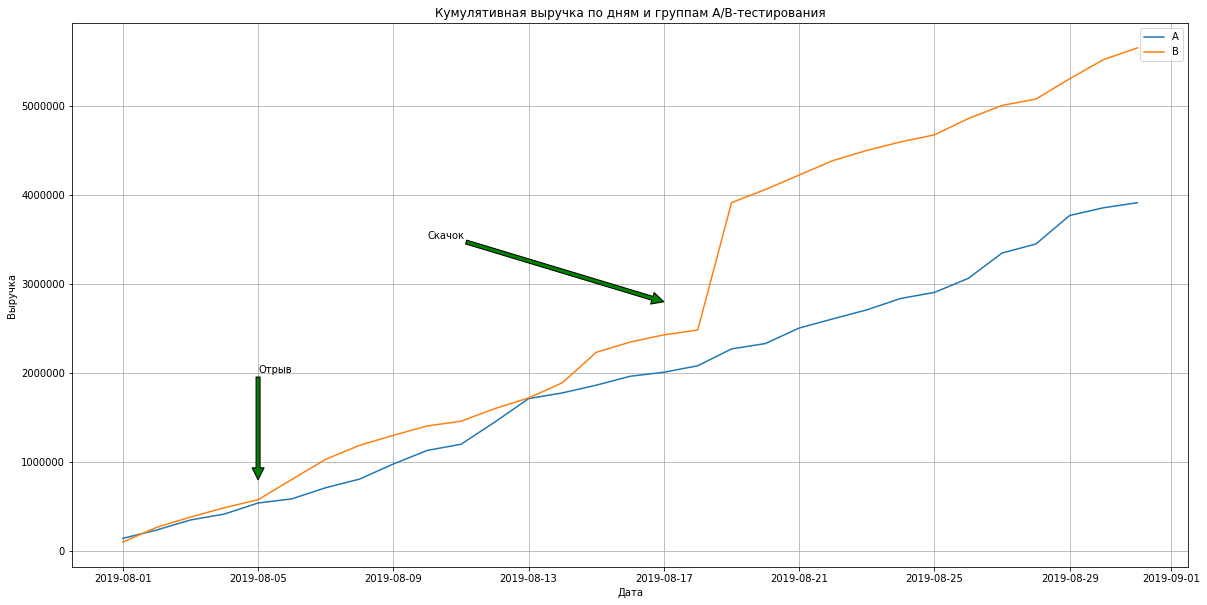

In [32]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Задаем параметры графика

plt.figure(figsize=(20, 10))
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')
plt.annotate('Скачок',xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),arrowprops=dict(facecolor='g'))
plt.annotate('Отрыв',xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),arrowprops=dict(facecolor='g'))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.grid()
plt.show()

В группе А выручка равномерно увеличивается. В группе В есть скачек выручки 18-19.08.2019 больше одного миллиона.Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.
### Построим график кумулятивного среднего чека по группам.

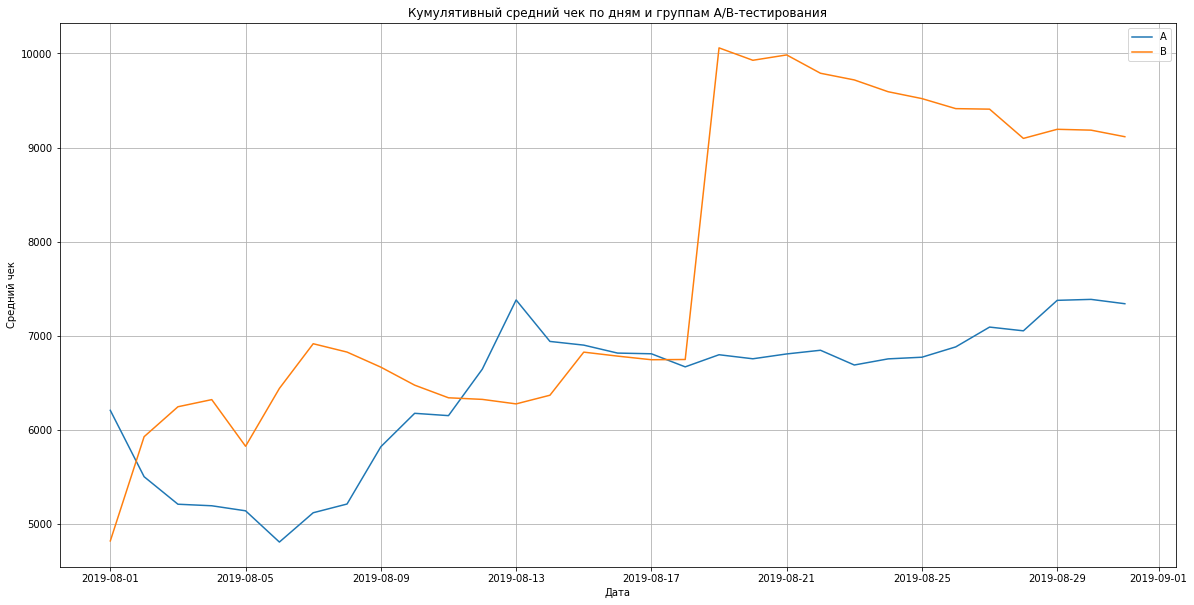

In [33]:
plt.figure(figsize=(20, 10))
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Кумулятивный средний чек по дням и группам A/B-тестирования')

# Разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.grid()
plt.show()

Средний чек становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B, после высокого всплеска 19.08.2019 с 7000 до 11000. Возможно, в группу B в этот день попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.
### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

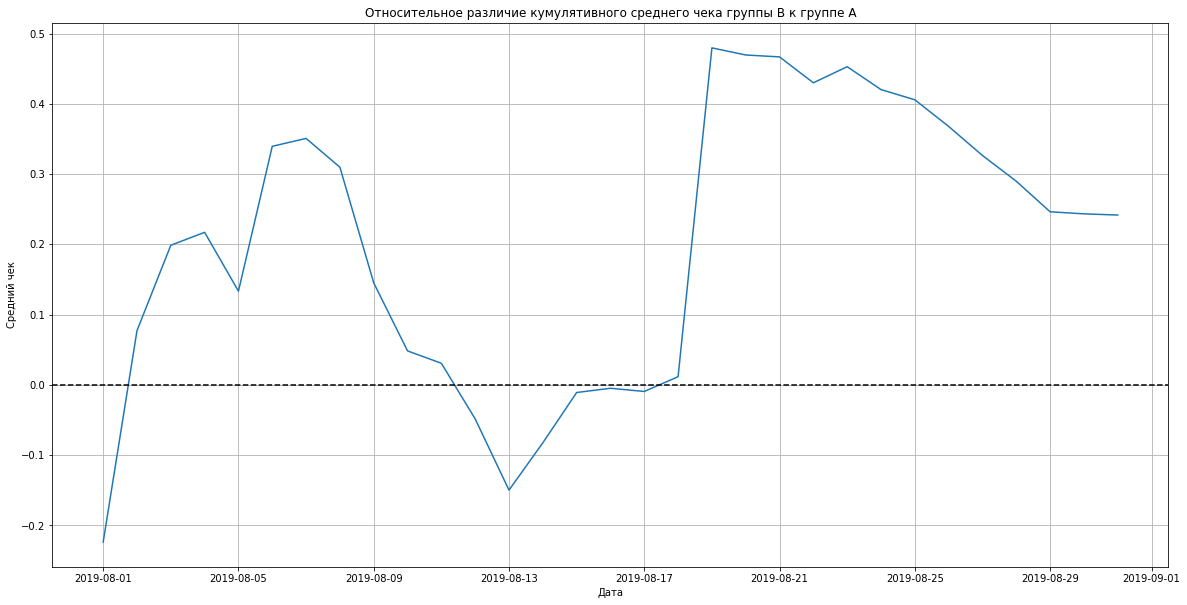

In [34]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,
                                                   left_on='date',
                                                   right_on='date',
                                                   how='left',
                                                   suffixes=['A', 'B'])
def plot_mergedCumulativeRevenue(df):
    plt.figure(figsize=(20, 10))
    plt.xlabel('Дата')
    plt.ylabel('Средний чек')
    plt.title('Относительное различие кумулятивного среднего чека группы B к группе A')

# cтроим отношение средних чеков
    plt.plot(df['date'], (df['revenueB']/df['ordersB'])/(df['revenueA']/df['ordersA'])-1)

# добавляем ось X
    plt.axhline(y=0, color='black', linestyle='--')
    plt.grid()
    plt.show()
plot_mergedCumulativeRevenue(mergedCumulativeRevenue)

В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы
### Построим график кумулятивной конверсии по группам.

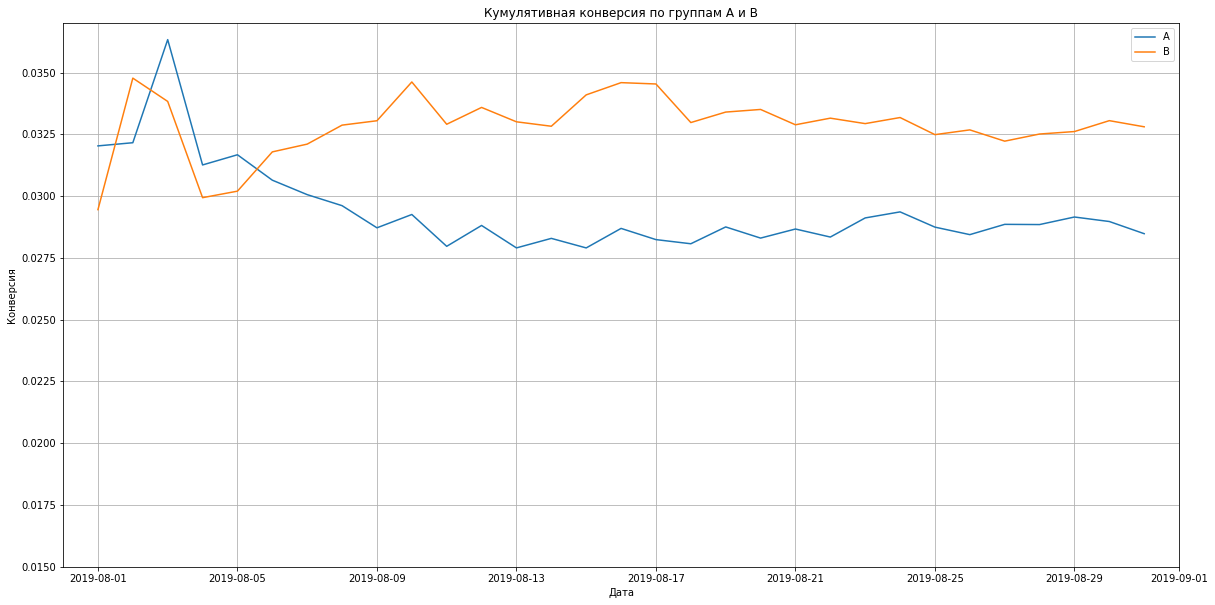

In [35]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(20, 10))
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('Кумулятивная конверсия по группам A и В')

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-07-31", '2019-09-01', 0.015, 0.037]) 
plt.grid()
plt.show()

Группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.
### Постройте график относительного изменения кумулятивной конверсии группы B к группе A.

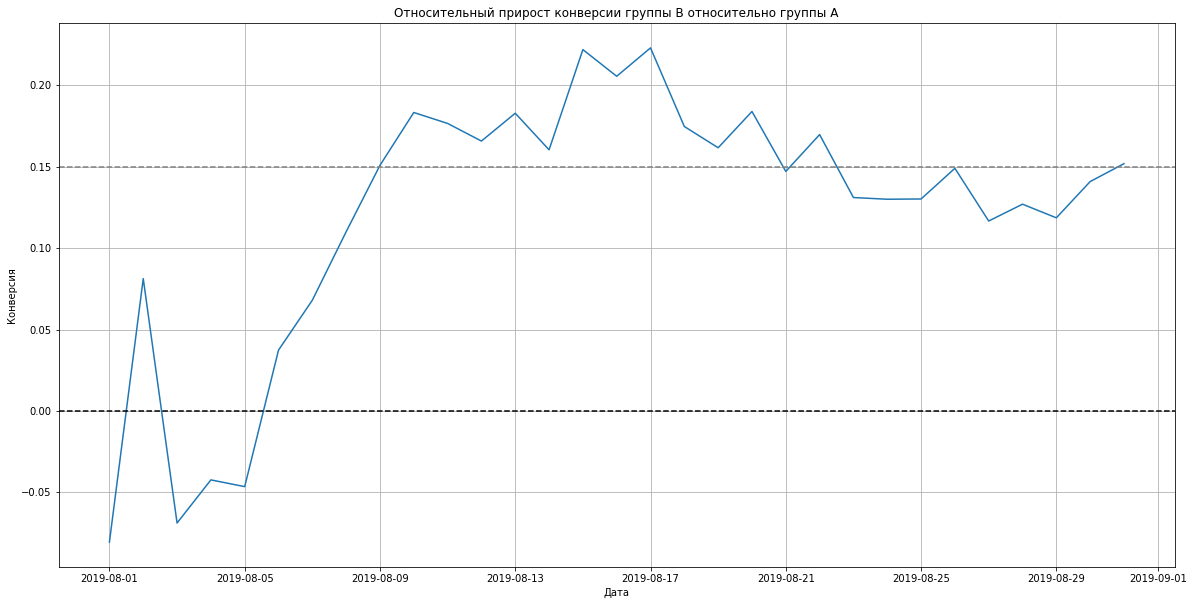

In [36]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],
                                                                           left_on='date',
                                                                           right_on='date',
                                                                           how='left',
                                                                           suffixes=['A', 'B'])
def plot_mergedCumulativeConversions(df):
    plt.figure(figsize=(20, 10))
    plt.xlabel('Дата')
    plt.ylabel('Конверсия')
    plt.title('Относительный прирост конверсии группы B относительно группы A')
    
    plt.plot(df['date'],
             df['conversionB']/df['conversionA']-1)
    
    plt.axhline(y=0, color='black', linestyle='--')
    plt.axhline(y=0.15, color='grey', linestyle='--')
    plt.grid()
    plt.show()
plot_mergedCumulativeConversions(mergedCumulativeConversions)

В начале теста конверсия группа B проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но теперь постепенно растёт.

В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.
### Построим точечный график количества заказов по пользователям.

In [37]:
ordersByUsers = (orders.drop(['group', 'revenue', 'date'], axis=1)
                     .groupby('visitorId', as_index=False)
                     .agg({'transactionId' : pd.Series.nunique})
                )

ordersByUsers.columns = ['userId','orders']
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,userId,orders
44,199603092,5
893,3717692402,5
740,3062433592,5
913,3803269165,5
55,237748145,5
615,2587333274,4
392,1614305549,4
114,457167155,4
933,3908431265,3
310,1294878855,3


Есть пользователи, которые совершали 5, 8, 9 и 11 заказов. Значительно больше, чем обычный пользователь за неделю.

Построим гистрограмму распределения количества заказов на одного пользователя.

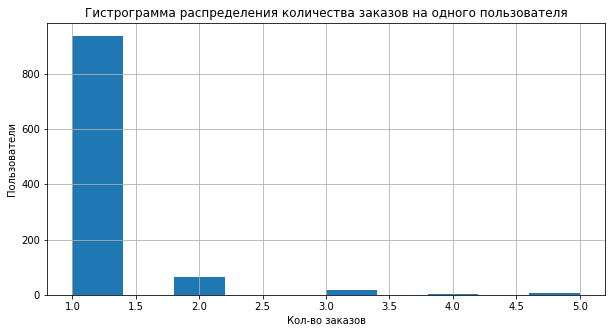

In [38]:
plt.figure(figsize=(10, 5))
plt.xlabel('Кол-во заказов')
plt.ylabel('Пользователи')
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.hist(ordersByUsers['orders'])
plt.grid()
plt.show()

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-4 заказами тоже значительна.

Построим точечную диаграмму числа заказов на одного пользователя:

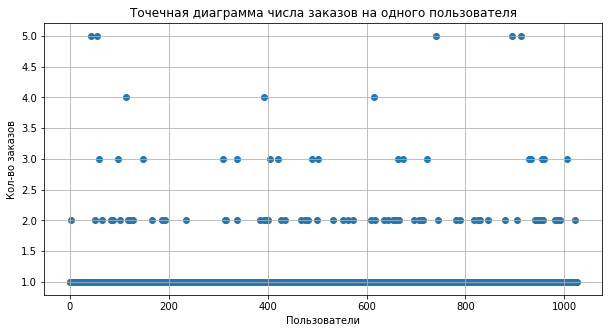

In [39]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(10, 5))
plt.xlabel('Пользователи')
plt.ylabel('Кол-во заказов')
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.scatter(x_values, ordersByUsers['orders'])
plt.grid()
plt.show()

Выводы подтверждаются: много пользователей с 2-4 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.
### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [40]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 3.])

Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более 3х раз.
### Построим точечный график стоимостей заказов.

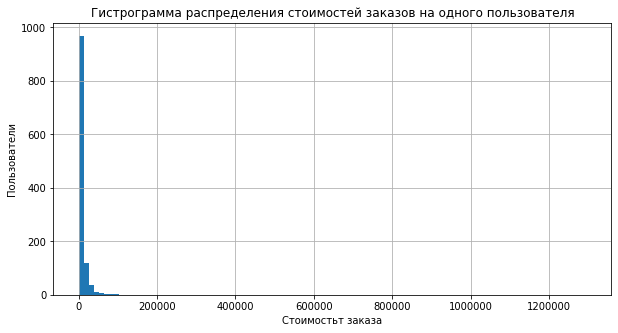

In [41]:
#Изучим гистограмму распределения стоимостей заказов
plt.figure(figsize=(10, 5))
plt.xlabel('Стоимостьт заказа')
plt.ylabel('Пользователи')
plt.title('Гистрограмма распределения стоимостей заказов на одного пользователя')
plt.hist(orders['revenue'], bins=100)
plt.grid()
plt.show()

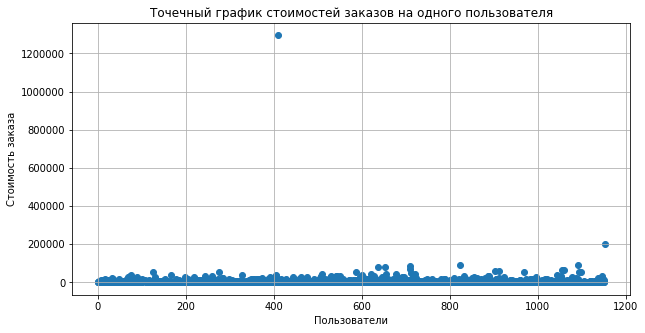

In [42]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10, 5))
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')
plt.title('Точечный график стоимостей заказов на одного пользователя')
plt.scatter(x_values, orders['revenue'])
plt.grid()
plt.show()

Есть 2 выброса 200000 и чуть выше 1200000.
### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [43]:
np.percentile(orders['revenue'], [95, 99])

array([27570.  , 56134.08])

Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233.2 рублей (округлим до 60000 руб.).

Разумно выбрать 3 заказа на одного пользователя и 60000 на один заказ, за нижнюю границу и отсеять аномальных пользователей по ней.
### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [44]:
# visitorsPerDateA — количество пользователей в выбранную дату в группе A;
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
#visitorsADaily.head()

In [45]:
# visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                             .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
#visitorsACummulative.head()

In [46]:
# visitorsPerDateB — количество пользователей в выбранную дату в группе B;
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
#visitorsBDaily.head()

In [47]:
# visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
#visitorsBCummulative.head()

In [48]:
# ordersPerDateA — количество заказов в выбранную дату в группе A;
# revenuePerDateA — суммарная выручка в выбранную дату в группе A;
ordersADaily = (orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
               )
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
#ordersADaily.head()

In [49]:
# ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
# revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
ordersACummulative = (ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]
                                        .agg({'date' : 'max',
                                              'ordersPerDateA' : 'sum',
                                              'revenuePerDateA' : 'sum'}), axis=1)
                                  .sort_values(by=['date'])
                     )
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
#ordersACummulative.head()

In [50]:
# ordersPerDateB — количество заказов в выбранную дату в группе B;
# revenuePerDateB — суммарная выручка в выбранную дату в группе B;
ordersBDaily = (orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
               )
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
#ordersBDaily.head()

In [51]:
# ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
# revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
ordersBCummulative = (ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
                                        .agg({'date' : 'max',
                                              'ordersPerDateB' : 'sum',
                                              'revenuePerDateB' : 'sum'}), axis=1)
                                  .sort_values(by=['date'])
                     )
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
#ordersBCummulative.head()

In [52]:
# Объединим все эти таблицы
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,21,101217,23,142779,21,101217,718,713,718,713
1,2019-08-02,20,93822,24,165531,43,236601,45,266748,619,581,1337,1294
2,2019-08-03,24,112473,16,114248,67,349074,61,380996,507,509,1844,1803
3,2019-08-04,13,66415,16,105771,80,415489,77,486767,715,769,2559,2572
4,2019-08-05,25,124218,22,90008,105,539707,99,576775,756,706,3315,3278


In [53]:
# Создадим таблицы с пользователями, которые заказывали хотя бы 1 раз и укажем число совершённых заказов.
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders'] 

In [54]:
# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
#Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                               name='orders')],
                     axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                               name='orders')],
                     axis=0) 

Проверим гипотезы:
1. Нулевая гипотеза: Статистически значимых различий в конверсии между группами А и В нет
2. Обратная гипотеза: Есть статистически значимые различия в конверсии между группами А и В

Критический уровень статистической значимости, alpha = 0.05

In [55]:
stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')

MannwhitneyuResult(statistic=176116601.0, pvalue=0.016372170136914905)

In [56]:
print("{0:.4f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]))

print("{0:.4f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.0164
0.1519


Вывод: По «сырым» данным различия в конверсии групп A и B существует.

Первое число — p-value = 0.0164 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. 

Однако показатель конверсии в группе B больше показателя в группе A на 15,19% — второе число в выводе.
### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов. + Найдём относительные различия в среднем чеке между группами

Проверим гипотезы:
1. Нулевая гипотеза: Статистически значимых различий в среднем чеке заказа между группами А и В нет
2. Обратная гипотеза: Есть статистически значимые различия в среднем чеке заказа между группами А и В

Критический уровень статистической значимости, alpha = 0.05

In [57]:
print("{0:.4f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'],
                                          alternative='two-sided')[1]))

print("{0:.4f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.9924
0.2418


P-value - 0.9924 значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B выше среднего чека группы A.
### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Напомним, что найденные в прошлых уроках 95-й и 99-й перцентили средних чеков равны 28000 и 58233.2 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 3 заказа на пользователя.

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 50 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.

Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 60 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [58]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],
                                 ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId']],
                                axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 60000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers.head(5)

1099    148427295
18      199603092
23      237748145
949     887908475
744     888512513
Name: visitorId, dtype: int64

In [59]:
print('Всего аномальных пользователей - {}'.format(abnormalUsers.shape))


Всего аномальных пользователей - (15,)


Подготовим выборки количества заказов по пользователям по группам теста

In [60]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
                                           pd.Series(0, index=np.arange(data['visitorsPerDateA']
                                                                        .sum() - len(ordersByUsersA['orders'])),
                                                     name='orders')],
                            axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
                                           pd.Series(0, index=np.arange(data['visitorsPerDateB']
                                                                        .sum() - len(ordersByUsersB['orders'])),name='orders')],
                            axis=0) 

Проверим гипотезы:
1. Нулевая гипотеза: Статистически значимых различий в конверсии между группами А и В нет
2. Обратная гипотеза: Есть статистически значимые различия в конверсии между группами А и В

Критический уровень статистической значимости, alpha = 0.05

In [61]:
# Применим статистический критерий Манна-Уитни к полученным выборкам
print("{0:.4f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1]))
print("{0:.4f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.0129
0.1555


Результаты по конверсии практически не изменились.
### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Проверим гипотезы:
1. Нулевая гипотеза: Статистически значимых различий в среднем чеке заказа между группами А и В нет
2. Обратная гипотеза: Есть статистически значимые различия в среднем чеке заказа между группами А и В

Критический уровень статистической значимости, alpha = 0.05

In [62]:
print("{0:.4f}".format(stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A',
                                                                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]
                                          ['revenue'],
                                          orders[np.logical_and(orders['group']=='B',
                                                                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]
                                          ['revenue'],
                                          alternative='two-sided')[1]))

print("{0:.4f}".format(orders[np.logical_and(orders['group']=='B',
                                             np.logical_not(orders['visitorId'].isin(abnormalUsers)))]
                       ['revenue'].mean() / orders[np.logical_and(orders['group']=='A',
                                                                  np.logical_not(orders['visitorId'].isin(abnormalUsers)))]
                       ['revenue'].mean() - 1)) 

0.9194
-0.0008


P-value немного уменьшился, был 0,9924 (по "сырым" данным) стал 0,9194 (по "очищенным" данным).Разница между сегментами сократилась с 24,18% до 0,08%. Причем по "сырым" данным средний чек был выше у групп В, а по очищенным стал не значительно выше у группы А.

Хотя общие выводы по результатам теста не изменились (мы не отвергаем нулевую гипотезу и считаем, что в среднем чеке нет различий), такой пример хорошо показывает, как сильно аномалии могут влиять на результаты A/B-теста!

### Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

1. Нет статистически значимого различия по конверсии между группами ни по «сырым», ни по данным после фильтрации аномалий;
2. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
3. График различия конверсии между группами сообщает, что результаты группы A хуже группы B и нет значительной тенденции к улучшению:

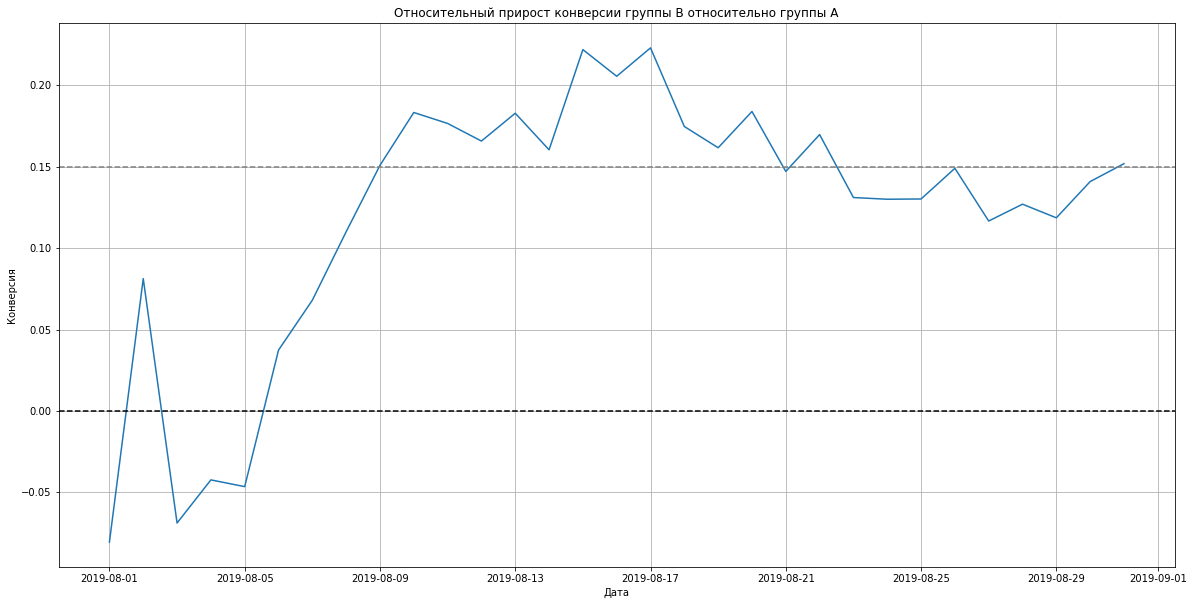

In [63]:
plot_mergedCumulativeConversions(mergedCumulativeConversions)

4. График различия среднего чека говорит о том, что результаты группы B лучше результатов группы А на 25%. Но Средний чек группы В снижается и возможно приблизится к среднему чеку группы А:

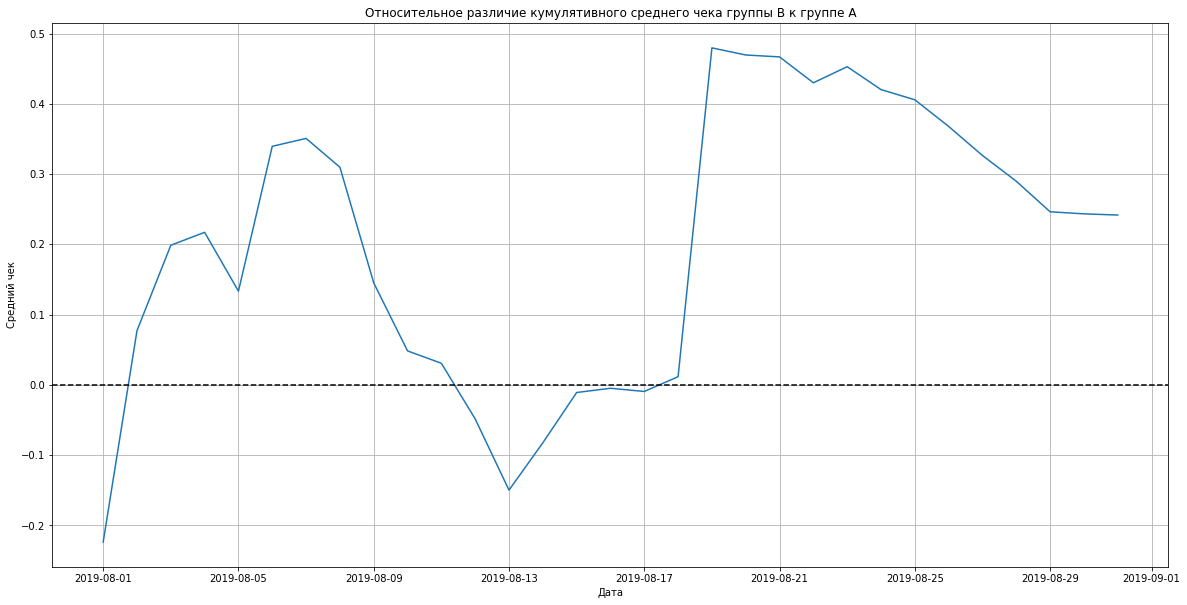

In [64]:
plot_mergedCumulativeRevenue(mergedCumulativeRevenue)

Но это график по "сырым" данным. По "очищеным" данным - мы считаем, что в среднем чеке нет различий.

Исходя из этих данных принимаем решение остановить тест, зафиксировать победу группы В.

**Общий вывод**

После проведения приоритизации гипотез стало ясно что наиболее перспективные, с учетом охвата пользователей, 3 гипотезы:
1.	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2.	Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3.	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей


В процессе работы с данными была выявлена проблема подглядывания, а именно: некоторые пользователи от сессии к сессии могли видеть как одну версию сайта, так и другую, что нарушает один из основных принцип работы A/B-теста - один пользователь видит только одну версию на всём протяжении теста.

Кумулятивные метрики по выручке, среднему чеку и конверсии почти все время лидировали в группе B. У нас на некоторое время возникли сомнения из-за резких колебаний на графике кумулятивного среднего чека в группе B до очистки данных от аномальных пользователей. Наши сомнения подтвердились на этот счет, т.к. после очистки разница между средними чеками стала минимальна, но это не даёт нам повода сомневаться в проведении теста и его результатах. До и после очистки данных, показатель конверсии в группе B больше показателя в группе A - сначала на 15,19% до и на 15,55% после очистки данных. Данная разница показателей конверсии между группами и до и после очистки данных является СТАТИСТИЧЕСКИ ЗНАЧИМОЙ, что пользволяет нам сделать вывод о том, что мы можем остановить наш A/B тест и зафиксировать победу группы B!